In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('test_2020.csv')
df.head()

,idn,a02_trad,a03_sum,a04_cosm,a1_1,a10_1,a11a_1,a11b_1,a11c_1,a12_1,...,var00240,var00241,var00242,var00243,var00244,var00245,var00246,var00247,var00248,VAR00001
0,1,Bushmen,60,36,0,0,0,0,0,1,...,,,,,,,,,,
1,2,Khoikhoi,71,22,0,0,0,0,0,0,...,,,,,,,,,,
2,3,Xhosa,64,19,0,0,0,0,0,0,...,,,,,,,,,,
3,4,"Zulu,Swasi",55,19,0,0,0,0,0,1,...,,,,,,,,,,
4,5,"Sotho, Tswana",75,19,0,0,0,0,0,1,...,,,,,,,,,,


### Чистка

In [3]:
df = df[df.columns[~pd.Series(df.columns).str.startswith('var')]]

In [4]:
df = df[df.idn != 1000]

In [5]:
df = df.iloc[:,:-1]

In [6]:
df.head()

,idn,a02_trad,a03_sum,a04_cosm,a1_1,a10_1,a11a_1,a11b_1,a11c_1,a12_1,...,n30_13,n31_13,n32_13,n33_13,n4_13,n5_13,n6_13,n7_13,n8_13,n9_13
0,1,Bushmen,60,36,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2,Khoikhoi,71,22,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Xhosa,64,19,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,"Zulu,Swasi",55,19,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,"Sotho, Tswana",75,19,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


Проверим, сколько мифов с одинаковыми значениями

In [7]:
df.duplicated(subset=df.columns[2:], keep = False).sum()

0

In [63]:
df.duplicated(subset=df.columns[4:], keep = False).sum()

0

In [ ]:
df.shape

То есть все строки в чем-то между собой различаются

In [8]:
df.e31a2_11 = df.e31a2_11.str.replace(" ",'0')
df.k136d_10 = df.k136d_10.str.replace(" ",'0')
df.k72a_10 = df.k72a_10.str.replace(" ",'0')
df.L72i_10 = df.L72i_10.str.replace(" ",'0')
df.m114b1_11 = df.m114b1_11.str.replace(" ",'0')
df.m39a5a2_11 = df.m39a5a2_11.str.replace(" ",'0')


In [9]:
df = df.fillna('0')
for i in df.iloc[:, 2:].columns:
    print(i)
    df.loc[:,i] = df.loc[:,i].astype(int)

8d_10
a39_1
a39a_1
a4_1
a40_5
a41_1
a42_1
a43_3
a43a_10
a44_2
a45_2
a46_1
a4a_1
a4b_1
a5_1
a5a_1
a6_1
a7_1
a7a_1
a8_1
a8a_1
a9_1
b1_3
b10_3
b100_3
b101_7b
b102_3
b103_7b
b104_7a
b104a_11
b105_7a
b106_7a
b107_7a
b108_3
b109_7a
b109a_7a
b110_3
b110a_3
b111_7a
b112_7a
b113_5
b114_7a
b115_7b
b115a_7b
b116_4_6a
b116a_4_6a
b116b_4_6a
b116c_4_6a
b117_7a_11
b118_7a
b119_7a
b11a_3
b13a_10
b14_3
b15_3
b16a_3
b16b_3
b16c_3
b17_3
b18_3
b19_3
b1a_3
b1b_3
b1c_3
b1d_3
b20_3
b21_3
b22_3
b22a_10
b23_4_5
b24_7a
b24a_7a
b25_7a
b26_10
b27_10
b28_3_6a
b28a_8
b28b_3_6a
b28c_8
b28d_3_7
b28d1_7a
b28e_1_3_7a
b29_3_8
b2a_3
b2b_3
b2c_3
b2d_3
b2e_3
b2f_3
b2g_7a
b3_3
b30a_7a
b30b_7a
b31_7a
b32_7a
b33_3
b33a_3_10
b33a1_3_10
b33b_7a
b33c_3
b33d_3
b33e_3
b33f_3
b33g_3
b34_7a
b35_7a
b35a_7a
b36_7a
b36a_7a
b36b_7a
b36c_7a
b37_7a
b38_7a
b38a_7a
b38b_7a
b38c_7a
b38d_7a
b38e_7a
b39_7a
b3a_3
b3b_3
b3c_3
b3d_3
b3e_3
b4_3
b40_7a
b40a_7a
b40b_7a
b41_7a
b41a_7a
b42_2
b42a_2
b42b_2
b42c_2
b42d_2
b42e_2
b42f_2
b42h_2
b42h1_2
b42

In [10]:
df.to_csv('test_2020_clean.csv', index = None)

### W2V

In [2]:
from gensim.models import Word2Vec


unable to import 'smart_open.gcs', disabling that module


In [12]:
df.head()

,idn,a02_trad,a03_sum,a04_cosm,a1_1,a10_1,a11a_1,a11b_1,a11c_1,a12_1,...,n30_13,n31_13,n32_13,n33_13,n4_13,n5_13,n6_13,n7_13,n8_13,n9_13
0,1,Bushmen,60,36,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2,Khoikhoi,71,22,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Xhosa,64,19,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,"Zulu,Swasi",55,19,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,"Sotho, Tswana",75,19,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [15]:
df.iloc[:,4:].head()

,a1_1,a10_1,a11a_1,a11b_1,a11c_1,a12_1,a12a_1,a12b_1,a12c_1,a12d_1,...,n30_13,n31_13,n32_13,n33_13,n4_13,n5_13,n6_13,n7_13,n8_13,n9_13
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
df.iloc[:,4:].shape

(979, 2678)

In [32]:
df.iloc[0,1]

'Bushmen'

In [37]:
df_feat.tail()

,a1_1,a10_1,a11a_1,a11b_1,a11c_1,a12_1,a12a_1,a12b_1,a12c_1,a12d_1,...,n30_13,n31_13,n32_13,n33_13,n4_13,n5_13,n6_13,n7_13,n8_13,n9_13
974,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
975,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
976,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
977,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
978,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
df_feat = df.iloc[:,4:]

In [38]:
df_feat.shape

(979, 2678)

In [48]:
# df.iloc[:,4].columns()
# sent = np.zeros((979, 2678))
sent = []

for k in range(df_feat.shape[0]):#row
    # print(row)
    row = []
    for i in range(df_feat.shape[1]):#column
        
        if df_feat.iloc[k,i] == 1:
            # print(df_feat.columns[i], (k,i))
            row.append(df_feat.columns[i])
    sent.append(row)

In [49]:
len(sent)

979

In [53]:
model = Word2Vec(sent, min_count=1, window=3, workers=3, sg=0)#look at size
model.save("w2v_myths.model")


In [3]:
model = Word2Vec.load("w2v_myths.model")

In [6]:
from gensim.models import KeyedVectors


model.wv.save("w2v_myths_vecs.kv")
# wv = KeyedVectors.load("model.wv", mmap='r')

In [56]:
model.wv['m63_10']

array([-0.06368445, -0.27445254, -0.1593863 , -0.32804644,  0.09984308,
       -0.07805284,  0.22911875, -0.17755619,  0.18716215,  0.11461881,
       -0.23524314,  0.13059393,  0.02747815,  0.09442244,  0.13981625,
        0.42705107,  0.08129855,  0.07523787,  0.1285448 , -0.2083779 ,
        0.10128602,  0.23767188, -0.07384205, -0.08392987, -0.19789828,
       -0.03639795,  0.08920544,  0.3652841 ,  0.2659418 ,  0.3479325 ,
        0.23155   ,  0.34227493,  0.1489023 ,  0.25426817, -0.0583616 ,
        0.13027285, -0.3204698 , -0.07499784, -0.08692472, -0.03453571,
        0.15968242, -0.13451406, -0.07705105,  0.22801402,  0.23351903,
        0.11299535,  0.17689957, -0.11094598,  0.0898272 ,  0.07633442,
       -0.19436929, -0.13406767, -0.09109384, -0.16439414, -0.18531284,
       -0.03505012,  0.08804061,  0.23487724,  0.05528919,  0.44588357,
        0.09177367,  0.4185646 , -0.22675727,  0.1377625 ,  0.19585751,
       -0.00178565, -0.4237302 ,  0.23554267, -0.10651831, -0.50

In [59]:
model.wv.vectors.shape

(2676, 100)

Посчитаем косинусную близость для векторов мифов

In [60]:
from scipy import spatial

index2word_set = set(model.wv.index2word)

def avg_feature_vector(sentence, model, num_features, index2word_set):
    # words = sentence.split()
    feature_vec = np.zeros((num_features, ), dtype='float32')
    n_words = 0
    for word in sentence:
        if word in index2word_set:
            n_words += 1
            feature_vec = np.add(feature_vec, model[word])
    if (n_words > 0):
        feature_vec = np.divide(feature_vec, n_words)
    return feature_vec

In [69]:
s1_afv = avg_feature_vector(sent[0], model=model, num_features=100, index2word_set=index2word_set)
s2_afv = avg_feature_vector(sent[978], model=model, num_features=100, index2word_set=index2word_set)
sim = 1 - spatial.distance.cosine(s1_afv, s2_afv)
print(sim)

0.9943461418151855
/home/andrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':


In [74]:
model.wv.n_similarity(sent[0],sent[978])

0.9943461599900527

In [77]:
rate = np.zeros((979,979))

for i in range(979):
    for k in range(979):
        rate[i,k] = model.wv.n_similarity(sent[i],sent[k])

In [78]:
rate

array([[1.        , 0.98353175, 0.95375358, ..., 0.9944855 , 0.99026709,
        0.99434616],
       [0.98353175, 1.        , 0.98440205, ..., 0.98403812, 0.95988603,
        0.97848691],
       [0.95375358, 0.98440205, 1.        , ..., 0.96571203, 0.92796953,
        0.95854281],
       ...,
       [0.9944855 , 0.98403812, 0.96571203, ..., 1.        , 0.98594118,
        0.99653296],
       [0.99026709, 0.95988603, 0.92796953, ..., 0.98594118, 1.        ,
        0.99459968],
       [0.99434616, 0.97848691, 0.95854281, ..., 0.99653296, 0.99459968,
        1.        ]])

In [85]:
pd.DataFrame.from_records(rate).to_csv('ratings_w2v.csv', index = None, header = None)

In [11]:
dd

,0,1,2,3,4,5,6,7,8,9,...,969,970,971,972,973,974,975,976,977,978
0,1.000000,0.983532,0.953754,0.969299,0.966373,0.976364,0.974619,0.991722,0.939929,0.977678,...,0.980773,0.997642,0.991804,0.993155,0.973624,0.980365,0.930926,0.994485,0.990267,0.994346
1,0.983532,1.000000,0.984402,0.986639,0.989624,0.996029,0.985771,0.994965,0.960241,0.982278,...,0.985268,0.988057,0.985965,0.981050,0.937516,0.990706,0.860174,0.984038,0.959886,0.978487
2,0.953754,0.984402,1.000000,0.996662,0.990850,0.982919,0.990818,0.978174,0.987180,0.944219,...,0.980320,0.958017,0.972132,0.961732,0.899821,0.981576,0.793493,0.965712,0.927970,0.958543
3,0.969299,0.986639,0.996662,1.000000,0.990292,0.982863,0.994113,0.984395,0.988438,0.948847,...,0.986079,0.971336,0.982120,0.975207,0.923122,0.984260,0.832312,0.978309,0.949253,0.973710
4,0.966373,0.989624,0.990850,0.990292,1.000000,0.993094,0.987220,0.984490,0.974136,0.969923,...,0.982688,0.967646,0.974178,0.965141,0.904479,0.986350,0.817332,0.970056,0.933240,0.960883
5,0.976364,0.996029,0.982919,0.982863,0.993094,1.000000,0.983838,0.992224,0.958091,0.987408,...,0.985537,0.978944,0.979961,0.973414,0.914546,0.993089,0.838260,0.977122,0.943406,0.966909
6,0.974619,0.985771,0.990818,0.994113,0.987220,0.983838,1.000000,0.991110,0.988585,0.955267,...,0.995797,0.973030,0.991846,0.984736,0.930394,0.993053,0.845586,0.987129,0.957220,0.980653
7,0.991722,0.994965,0.978174,0.984395,0.984490,0.992224,0.991110,1.000000,0.964285,0.982203,...,0.994380,0.991771,0.996510,0.993095,0.951292,0.996493,0.884992,0.995004,0.973852,0.989424
8,0.939929,0.960241,0.987180,0.988438,0.974136,0.958091,0.988585,0.964285,1.000000,0.910864,...,0.980317,0.938532,0.968332,0.960758,0.893477,0.972017,0.798221,0.963045,0.922209,0.954325
9,0.977678,0.982278,0.944219,0.948847,0.969923,0.987408,0.955267,0.982203,0.910864,1.000000,...,0.966090,0.979342,0.966750,0.964246,0.917931,0.977794,0.869946,0.967421,0.944829,0.957807


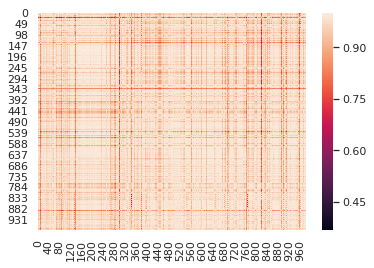

In [12]:
import seaborn as sns; sns.set()
import pandas as pd

ax = sns.heatmap(pd.read_csv('ratings_w2v.csv', header = None))

In [84]:
import csv

def csv_writer(data, path):
    """
    Write data to a CSV file path
    """
    with open(path, "w", newline='') as csv_file:
        writer = csv.writer(csv_file, delimiter=',')
        for line in data:
            writer.writerow(line)


csv_writer(sent, 'sent_for_w2v.txt')

### Neural topic modeling

#### ABAE

Адаптировано из https://github.com/alexeyev/abae-pytorch

In [1]:
import csv

def csv_reader(file_obj):
    """
    Read a csv file
    """
    sent = []
    reader = csv.reader(file_obj)
    for row in reader:
        sent.append(row)
    return sent

with open('sent_for_w2v.txt', "r") as f_obj:
        sent = csv_reader(f_obj)

In [7]:
from model import ABAE
import torch
import gensim
from gensim.models import Word2Vec
import numpy as np
from utils import *



aspects_number = 10
epochs = 10
batch_size = 100
wv_path = "w2v_myths.model"
maxlen = 3
neg_samples = 5


w2v_model = Word2Vec.load("w2v_myths.model")
wv_dim = w2v_model.vector_size
y = torch.zeros(batch_size, 1)

model = ABAE(wv_dim=wv_dim,
             asp_count=aspects_number,
             init_aspects_matrix=get_centroids(w2v_model, aspects_count=aspects_number))
print(model)

criterion = torch.nn.MSELoss(reduction="sum")

optimizer = torch.optim.Adam(model.parameters())
# scheduler = None

losses = []
for t in range(epochs):

    print("Epoch %d/%d" % (t + 1, epochs))

    data_iterator = read_data_tensors(sent, wv_path,
                                      batch_size=batch_size, maxlen=maxlen)

    for item_number, (x, texts) in enumerate(data_iterator):
        if x.shape[0] < batch_size:  # pad with 0 if smaller than batch size
            x = np.pad(x, ((0,batch_size - x.shape[0]), (0, 0), (0, 0)), mode = 'constant')

        x = torch.from_numpy(x)

        # extracting bad samples from the very same batch; not sure if this is OK, so todo
        negative_samples = torch.stack(
            tuple([x[torch.randperm(x.shape[0])[:neg_samples]] for _ in range(batch_size)]))

        # prediction
        y_pred = model(x, negative_samples)

        # error computation
        loss = criterion(y_pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # scheduler.step(epoch=t)
        
        if item_number % 1000 == 0:

            print(item_number, "batches, and LR:", optimizer.param_groups[0]['lr'])

            for i, aspect in enumerate(model.get_aspect_words(w2v_model)):
                print(i + 1, " ".join(["%10s" % a for a in aspect]))
            losses.append(loss.item())
            print("Loss:", loss.item())
            print()


/home/andrey/anaconda3/lib/python3.6/site-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
/home/andrey/Загрузки/myths/model.py:16: UserWarning: nn.init.kaiming_uniform is now deprecated in favor of nn.init.kaiming_uniform_.
  init.kaiming_uniform(self.M.data)
/home/andrey/anaconda3/lib/python3.6/site-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
/home/andrey/Загрузки/myths/model.py:31: UserWarning: Implicit dimension choice for softmax has be

ABAE(
  (attention): SelfAttention(
    wv_dim=100, maxlen=201
    (attention_softmax): Softmax()
  )
  (linear_transform): Linear(in_features=100, out_features=10, bias=True)
  (softmax_aspects): Softmax()
)
Epoch 1/10
0 batches, and LR: 0.001
1      a32_2     a32d_2       a3_1      b3a_3      b3b_3       a5_1       a4_1      b2a_3      a35_2      c6_10     d4a_3a     a32e_2      c19_3      b42_2      c6d_3
2      k25_5    k27n_10      a32_2     a32d_2   k27n1_10     k24_10      k2_10       a3_1       a4_1       a5_1     k73_10      a35_2     k32_10    k73a_10     k1f_10
3    k27n_10      k25_5   k27n1_10     k24_10      k2_10     k1f_10     k32_10    k29a_10     k28_10    k27e_11   k27hh_10    k27f_10     k2a_10   k25a1_10    k27s_10
4      k25_5    k27n_10      a32_2     a32d_2   k27n1_10     k24_10      k2_10       a3_1     k73_10    k73a_10       a4_1       a5_1      a35_2     k32_10     m29b_9
5     m29b_9     m29g_9    m29b2_9     m30_11    m29b1_9     m38_11    m29k1_9     m21_

Epoch 6/10
0 batches, and LR: 0.001
1      c6_10     d4a_3a      b3b_3      b3a_3      a32_2      c6d_3     a32d_2      e9_10      b2a_3       a5_1      c19_3       a4_1       a3_1       c2_3      e5a_5
2      a32_2      k25_5     a32d_2    k27n_10       a3_1   k27n1_10     k24_10       a5_1       a4_1      k2_10      a35_2      b3a_3      b3b_3      b2a_3     k73_10
3    k27n_10      k25_5   k27n1_10     k24_10      k2_10     k1f_10     k32_10    k29a_10     k28_10    k27e_11   k27hh_10    k27f_10     k2a_10   k25a1_10     k12_10
4      k25_5    k27n_10   k27n1_10     k24_10      k2_10     k73_10     k32_10    k73a_10     m29b_9     k1f_10     k75_10     m29g_9    m29b2_9    k29a_10     m30_11
5     m29b_9     m29g_9    m29b2_9     m30_11    m29b1_9     m38_11    m29k1_9     m21_10    m29g1_9     m23_11    m29w3_9    m38a_11     m29a_9     L72_10    m29w2_9
6      k25_5    k27n_10     k73_10    k73a_10     k75_10   k27n1_10     k24_10      k2_10     k32_10     k1f_10    k29a_10   k73a

In [40]:
from sklearn.cluster.k_means_ import MiniBatchKMeans

def read_data_batches(sent, batch_size=50, minlength=3):
    """
    Reading batched texts of given min. length
    :param path: path to the text file ``one line -- one normalized sentence''
    :return: batches iterator
    """
    batch = []

    for line in sent:#open(path):
#         line = line.strip().split()

        # lines with less than `minlength` words are omitted
        if len(line) >= minlength:
            batch.append(line)
            if len(batch) >= batch_size:
                yield batch
                batch = []

    if len(batch) > 0:
        yield batch


def text2vectors(text, w2v_model, maxlen, vocabulary):
    """
    Token sequence -- to a list of word vectors;
    if token not in vocabulary, it is skipped; the rest of
    the slots up to `maxlen` are replaced with zeroes
    :param text: list of tokens
    :param w2v_model: gensim w2v model
    :param maxlen: max. length of the sentence; the rest is just cut away
    :return:
    """

    acc_vecs = []

    for word in text:
        if word in w2v_model and (vocabulary is None or word in vocabulary):
            acc_vecs.append(w2v_model.wv[word])

    # padding for consistent length with ZERO vectors
    if len(acc_vecs) < maxlen:
        acc_vecs.extend([np.zeros(w2v_model.vector_size)] * (maxlen - len(acc_vecs)))

    return acc_vecs


def get_w2v(path):
    """
        Reading word2vec model given the path
    """
    return gensim.models.Word2Vec.load(path)


def read_data_tensors(sent, word_vectors_path=None,
                      batch_size=50, vocabulary=None,
                      maxlen=100, pad_value=0, minsentlength=5):
    """
        Data for training the NN -- from text file to word vectors sequences batches
    :param path:
    :param word_vectors_path:
    :param batch_size:
    :param vocabulary:
    :param maxlen:
    :param pad_value:
    :param minsentlength:
    :return:
    """
    w2v_model = get_w2v(word_vectors_path)

    for batch in read_data_batches(sent, batch_size, minsentlength):
        batch_vecs = []
        batch_texts = []
        
        for text in batch:
            batch_vecs.append(np.asarray(vectors_as_list[:maxlen], dtype=np.float32))
            batch_texts.append(text)

        yield np.stack(batch_vecs, axis=0), batch_texts

        
def get_centroids(w2v_model, aspects_count):
    """
        Clustering all word vectors with K-means and returning L2-normalizes
        cluster centroids; used for ABAE aspects matrix initialization
    """

    km = MiniBatchKMeans(n_clusters=aspects_count, verbose=0, n_init=100)
    m = []

    for k in w2v_model.wv.vocab:
        m.append(w2v_model.wv[k])

    m = np.matrix(m)

    km.fit(m)
    clusters = km.cluster_centers_

    # L2 normalization
    norm_aspect_matrix = clusters / np.linalg.norm(clusters, axis=-1, keepdims=True)

    return norm_aspect_matrix

In [6]:
np.__version__

'1.16.4'

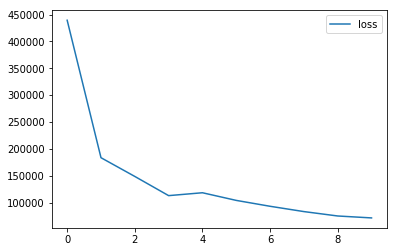

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.plot(range(len(losses)), losses, label='loss')
plt.legend()
plt.show()

In [13]:
model.get_aspect_words(w2v_model)

[['c6_10',
  'd4a_3a',
  'c6d_3',
  'e9_10',
  'c19_3',
  'b3b_3',
  'e5a_5',
  'k73_10',
  'c2_3',
  'k73a_10',
  'e11_10',
  'c5a_3',
  'b3a_3',
  'f9_5',
  'k75_10'],
 ['a32_2',
  'a32d_2',
  'a3_1',
  'a4_1',
  'a5_1',
  'a35_2',
  'b2a_3',
  'b3a_3',
  'b3b_3',
  'a32e_2',
  'k25_5',
  'k27n_10',
  'a12_1',
  'm29b_9',
  'm29b2_9'],
 ['k27n_10',
  'k25_5',
  'k27n1_10',
  'k24_10',
  'k2_10',
  'k32_10',
  'k1f_10',
  'k29a_10',
  'k28_10',
  'k27e_11',
  'k27hh_10',
  'k27f_10',
  'k2a_10',
  'k25a1_10',
  'k12_10'],
 ['k25_5',
  'k27n_10',
  'k27n1_10',
  'k24_10',
  'k2_10',
  'k32_10',
  'k73_10',
  'k73a_10',
  'k75_10',
  'm29b_9',
  'k1f_10',
  'k29a_10',
  'm29g_9',
  'm29b2_9',
  'k28_10'],
 ['m29b_9',
  'm29g_9',
  'm30_11',
  'm29b2_9',
  'm29b1_9',
  'm38_11',
  'm29k1_9',
  'm21_10',
  'm29g1_9',
  'm23_11',
  'm29w3_9',
  'm38a_11',
  'm29a_9',
  'L72_10',
  'm29w2_9'],
 ['k25_5',
  'k27n_10',
  'k73_10',
  'k75_10',
  'k73a_10',
  'k27n1_10',
  'k24_10',
  'k32_10',

In [14]:
df_dict = pd.read_csv('test_2020_variables.csv')

In [24]:
df_dict.columns = ['id','name','num']

In [31]:
map_dict = {row[0]:row[1] for row in df_dict.iloc[:,0:2].values}

In [35]:
for i in model.get_aspect_words(w2v_model):
    print(i)
    for k in i:
        print(k,  map_dict[k])
    print('*'*20)

['c6_10', 'd4a_3a', 'c6d_3', 'e9_10', 'c19_3', 'b3b_3', 'e5a_5', 'k73_10', 'c2_3', 'k73a_10', 'e11_10', 'c5a_3', 'b3a_3', 'f9_5', 'k75_10']
c6_10 c6 The diver
d4a_3a d4a Theft of fire
c6d_3 c6d The earth-diver
e9_10 e9 Misterious housekeeper (M831)
c19_3 c19 Acquisition of the Sun
b3b_3 b3b The earth grows big
e5a_5 e5a First people climb up from the underworld
k73_10 k73 Children of junior wife
c2_3 c2 Conflagration & flood
k73a_10 k73a Baby substituted with object or animal
e11_10 e11 Animal skin destroyed
c5a_3 c5a The flood: bird scouts
b3a_3 b3a Primeval water
f9_5 f9 Dangerous female
k75_10 k75 The youngest son-in-law
********************
['a32_2', 'a32d_2', 'a3_1', 'a4_1', 'a5_1', 'a35_2', 'b2a_3', 'b3a_3', 'b3b_3', 'a32e_2', 'k25_5', 'k27n_10', 'a12_1', 'm29b_9', 'm29b2_9']
a32_2 a32 Man-in-the-moon
a32d_2 a32d Person in the moon
a3_1 a3 Male Sun female Moon
a4_1 a4 Female sun
a5_1 a5 Sun and Moon both male
a35_2 a35 Dark marks on Moon (non-figurative)
b2a_3 b2a Female earth
b3

### PCA

In [36]:
df = pd.read_csv('test_2020_clean.csv')

In [37]:
df.head()

,idn,a02_trad,a03_sum,a04_cosm,a1_1,a10_1,a11a_1,a11b_1,a11c_1,a12_1,...,n30_13,n31_13,n32_13,n33_13,n4_13,n5_13,n6_13,n7_13,n8_13,n9_13
0,1,Bushmen,60,36,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2,Khoikhoi,71,22,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Xhosa,64,19,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,"Zulu,Swasi",55,19,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,"Sotho, Tswana",75,19,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


x = df.iloc[:, 2:].astype(int).values

x = StandardScaler().fit_transform(x)


pca = PCA(n_components=0.9)
x_pca = pca.fit_transform(x)

x_pca.shape



(979, 467)

### SVD

In [39]:
from numpy.linalg import svd

n = 20 # Singular Values
U, s, V = svd(x)
Sig = np.mat(np.eye(n)*s[:n])
newdata = U[:,:n]

In [ ]:
newdata

### TSNE

In [40]:
from sklearn.manifold import TSNE

X_tsne = TSNE(learning_rate=100,).fit_transform(x)

In [ ]:
X_tsne

### Косинусная близость

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

similarities = cosine_similarity(x)
print('pairwise dense output:\n {}\n'.format(similarities))
similarities.shape

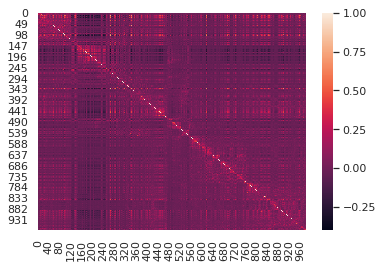

In [50]:
import seaborn as sns; sns.set()

ax = sns.heatmap(similarities)

### Kmeans

In [43]:
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans



# inertia = []
# for k in range(1, 25):
#     kmeans = KMeans(n_clusters=k, random_state=1).fit(x)
#     inertia.append(np.sqrt(kmeans.inertia_))

# plt.plot(range(1, 25), inertia, marker='s');
# plt.xlabel('$k$')
# plt.ylabel('$J(C_k)$')

Text(0,0.5,'$J(C_k)$')

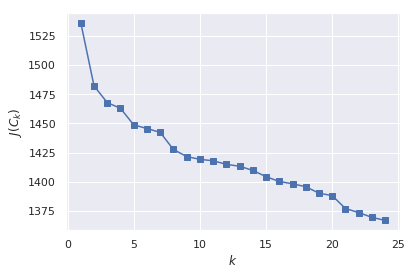

In [51]:
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans



inertia = []
for k in range(1, 25):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(x_pca)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1, 25), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$')

до 8 кластеров можно попробовать

In [45]:
km = KMeans(n_clusters=2)
idx = km.fit(x_pca)
clusters = km.labels_.tolist()
# print (km.labels_)



In [46]:
df_km = pd.concat([df.iloc[:,:2],pd.Series(km.labels_, name = 'km_label'), pd.DataFrame(x_pca[:,:2], columns=['pca1','pca2'])], axis = 1)

In [ ]:
from matplotlib import rc
#включаем русские символы на графике
font = {'family' : 'Verdana', 'weight': 'normal', 'size'   : 22}
rc('font', **font)

#можно сгенерировать цвета для кластеров
# import random
# def generate_colors(n):
#     color_list = []
#     for c in range(0,n):
#         r = lambda: random.randint(0,255)
#         color_list.append( '#%02X%02X%02X' % (r(),r(),r()) )
#     return color_list

cluster_names = dict((x, str(x+1)) for x in range(8))


fig, ax = plt.subplots(figsize=(72, 36))

groups = df_km.groupby('km_label')

for name, group in groups:
    ax.plot(group.pca1, group.pca2, marker='o', linestyle='', ms=22, mec='none', label=cluster_names[name],
           alpha=0.7)
    ax.set_aspect('auto')
    ax.tick_params(        axis= 'x',          
        which='both',      
        bottom='off',      
        top='off',         
        labelbottom='off')
    ax.tick_params(        axis= 'y',         
        which='both',     
        left='off',      
        top='off',       
        labelleft='off')
    
ax.legend(numpoints=1)  #показать легенду только 1 точки

# #добавляем метки/названия в х,у позиции с поисковым запросом
# for i in range(len(df)):
#    ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['title'], size=22)  
fig.suptitle('Kmeans+PCA', fontsize=38)
# fig.savefig('answ2_pca.jpg')
#показать график
plt.show() 
plt.close()

In [ ]:
def plot_emd(method:str, data, n_clusters:int = 8):
    km = KMeans(n_clusters=n_clusters)
    idx = km.fit(data)
    clusters = km.labels_.tolist()
#     print (km.labels_)

    df_km = pd.concat([df.iloc[:,:2],pd.Series(km.labels_, name = method+'_label'), 
                       pd.DataFrame(x_pca[:,:2], columns=[method+'1',method+'2'])], axis = 1)
    
    cluster_names = dict((x, str(x+1)) for x in range(8))


    fig, ax = plt.subplots(figsize=(40, 20))

    groups = df_km.groupby(method+'_label')

    for name, group in groups:
        ax.plot(group[method+'1'], group[method+'2'], marker='o', linestyle='', ms=22, mec='none', 
                label=cluster_names[name],
                alpha=0.7)
        ax.set_aspect('auto')
        ax.tick_params(        axis= 'x',          
            which='both',      
            bottom='off',      
            top='off',         
            labelbottom='off')
        ax.tick_params(        axis= 'y',         
            which='both',     
            left='off',      
            top='off',       
            labelleft='off')

    ax.legend(numpoints=1)  #показать легенду только 1 точки

    # #добавляем метки/названия в х,у позиции с поисковым запросом
    # for i in range(len(df)):
    #    ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['title'], size=22)  
    fig.suptitle('Kmeans+'+method, fontsize=38)
    # fig.savefig('answ2_pca.jpg')
    #показать график
#     plt.show() 
    plt.close()
    
    return df_km

/home/andrey/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/andrey/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/andrey/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/andrey/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 

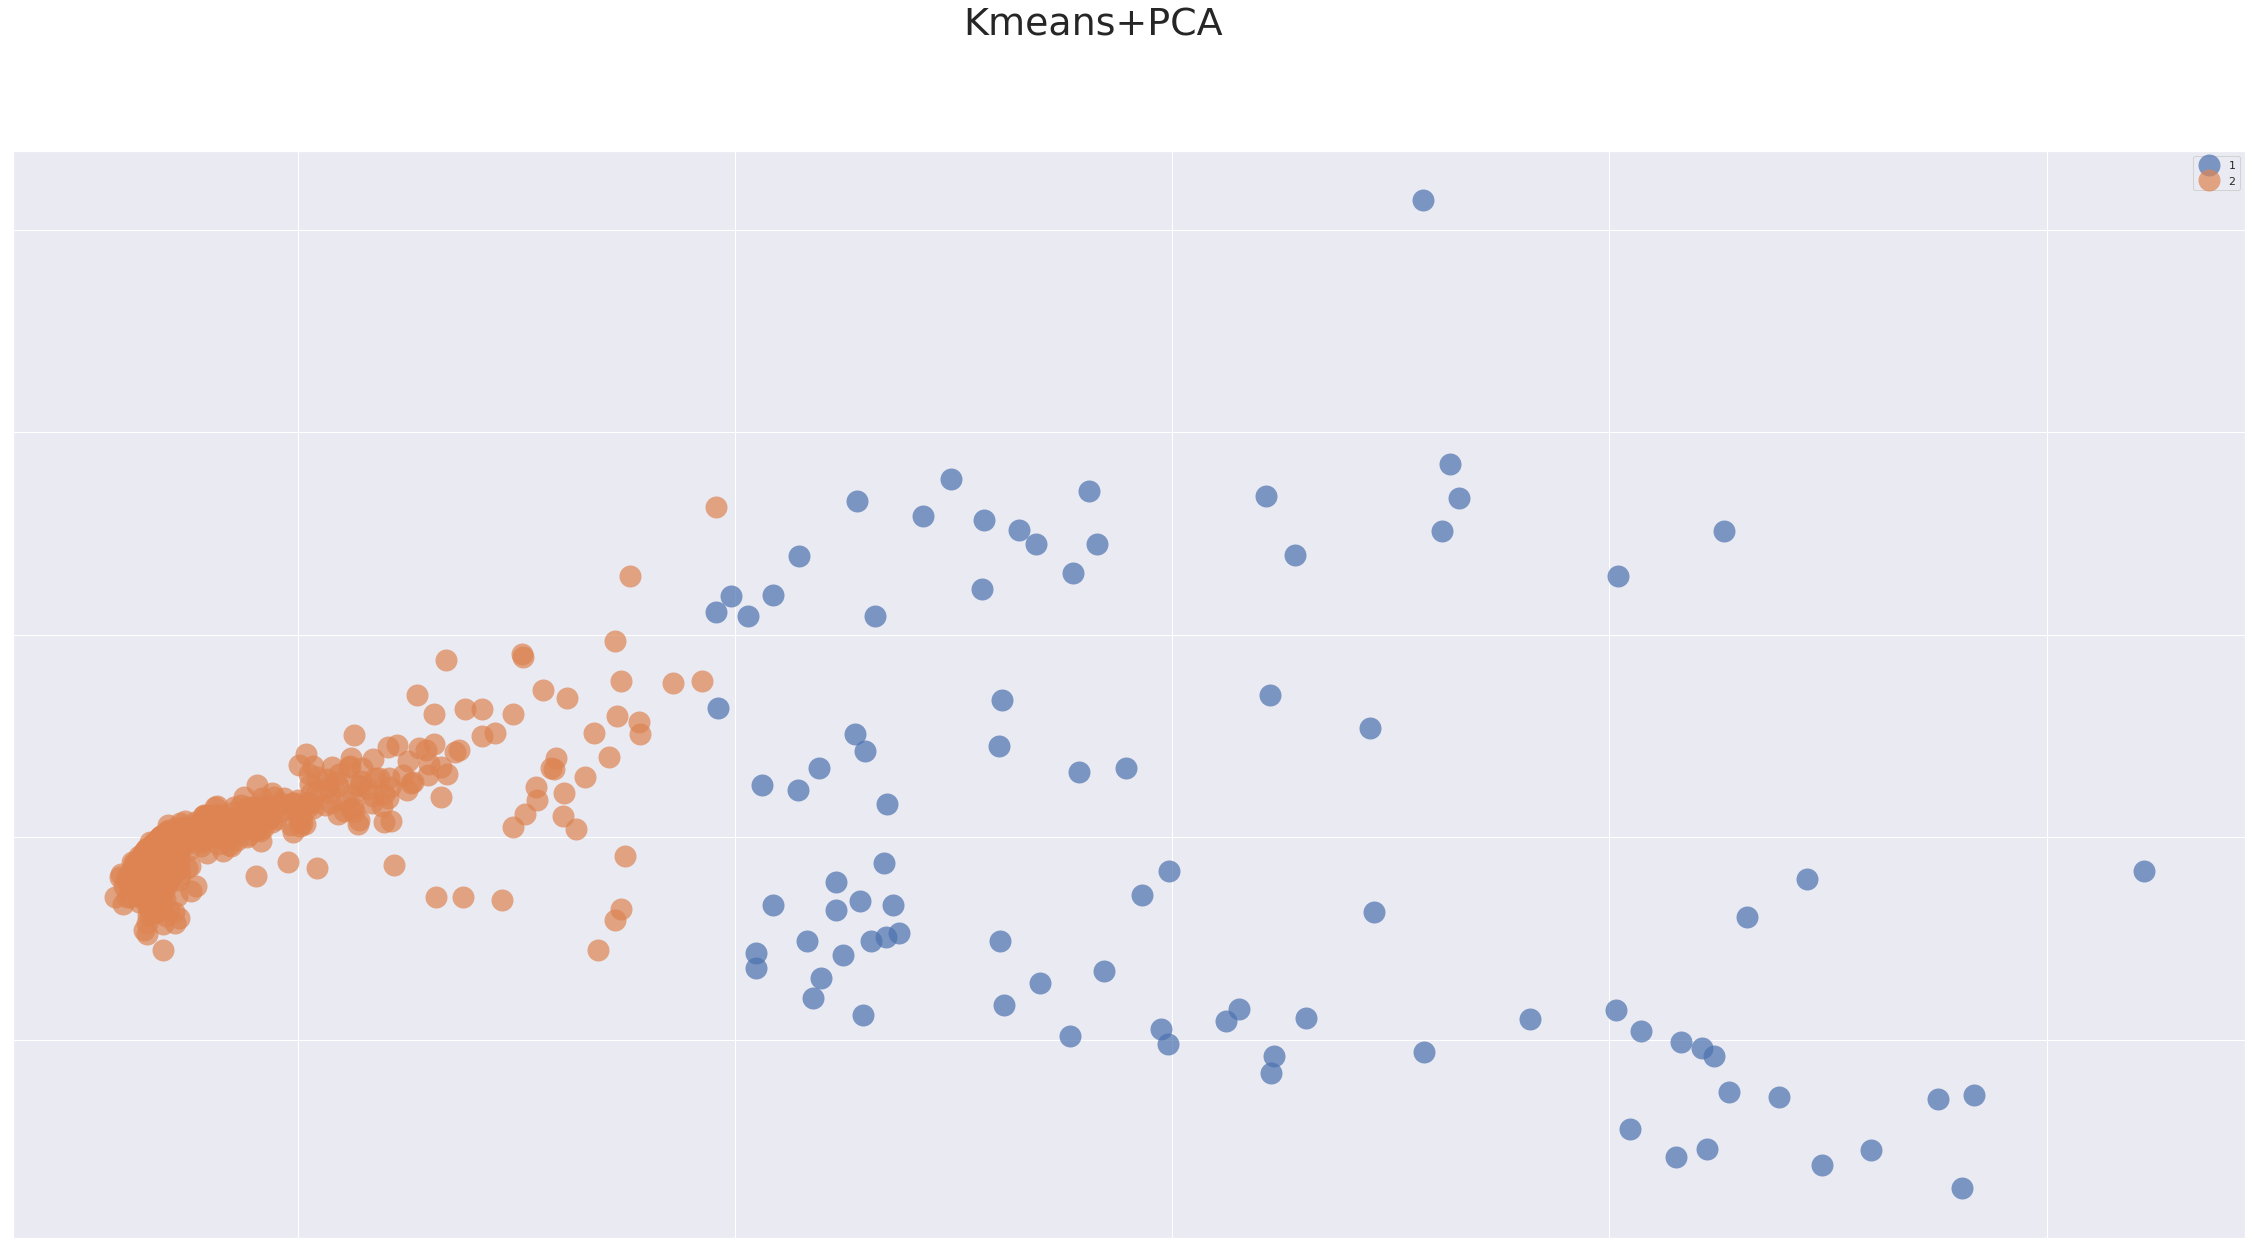

,idn,a02_trad,PCA_label,PCA1,PCA2
0,1,Bushmen,1,-5.449046,0.559562
1,2,Khoikhoi,1,-3.131956,0.176222
2,3,Xhosa,1,-2.762295,-0.220902
3,4,"Zulu,Swasi",1,-4.039606,0.922487
4,5,"Sotho, Tswana",1,-2.250557,0.248442
5,6,"Tonga, Ndebele",1,-3.894768,0.993513
6,7,Shona,1,-1.764166,1.218162
7,8,"Bemba,Kaonde,Lamba",1,-4.446332,1.045217
8,9,"Tsonga,Soli,Sala,Lenje",1,-3.599328,0.659439
9,10,Ila,1,-5.776440,0.328016


In [52]:
plot_emd('PCA',x_pca,2)

/home/andrey/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/andrey/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/andrey/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/andrey/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 

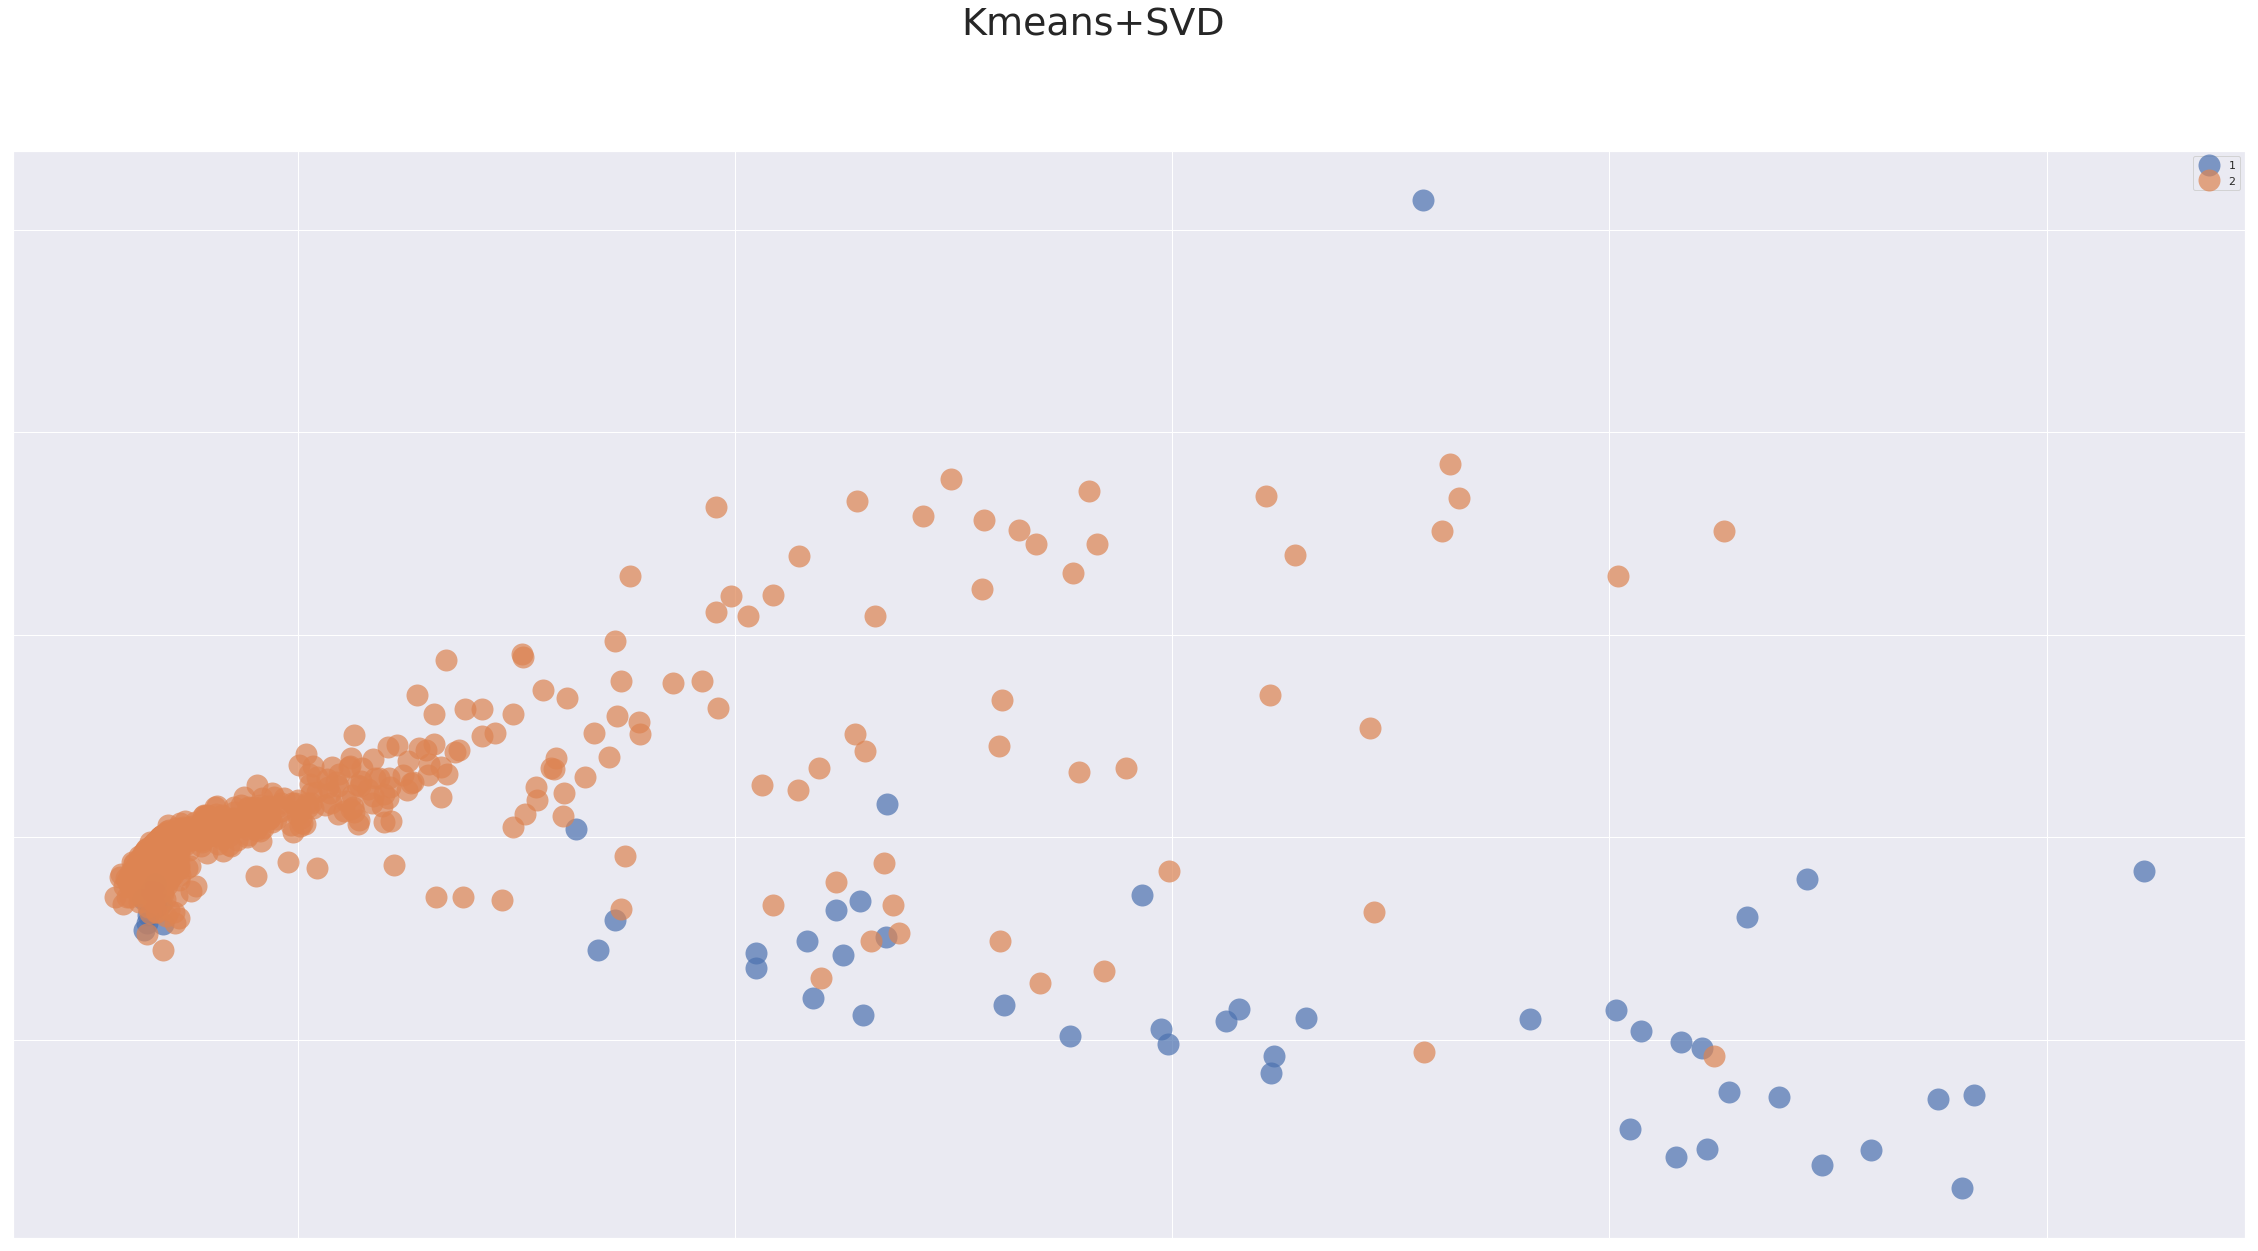

,idn,a02_trad,SVD_label,SVD1,SVD2
0,1,Bushmen,1,-5.449046,0.559562
1,2,Khoikhoi,1,-3.131956,0.176222
2,3,Xhosa,1,-2.762295,-0.220902
3,4,"Zulu,Swasi",1,-4.039606,0.922487
4,5,"Sotho, Tswana",1,-2.250557,0.248442
5,6,"Tonga, Ndebele",1,-3.894768,0.993513
6,7,Shona,1,-1.764166,1.218162
7,8,"Bemba,Kaonde,Lamba",1,-4.446332,1.045217
8,9,"Tsonga,Soli,Sala,Lenje",1,-3.599328,0.659439
9,10,Ila,1,-5.776440,0.328016


In [57]:
plot_emd('SVD',newdata,2)

/home/andrey/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/andrey/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/andrey/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/andrey/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 

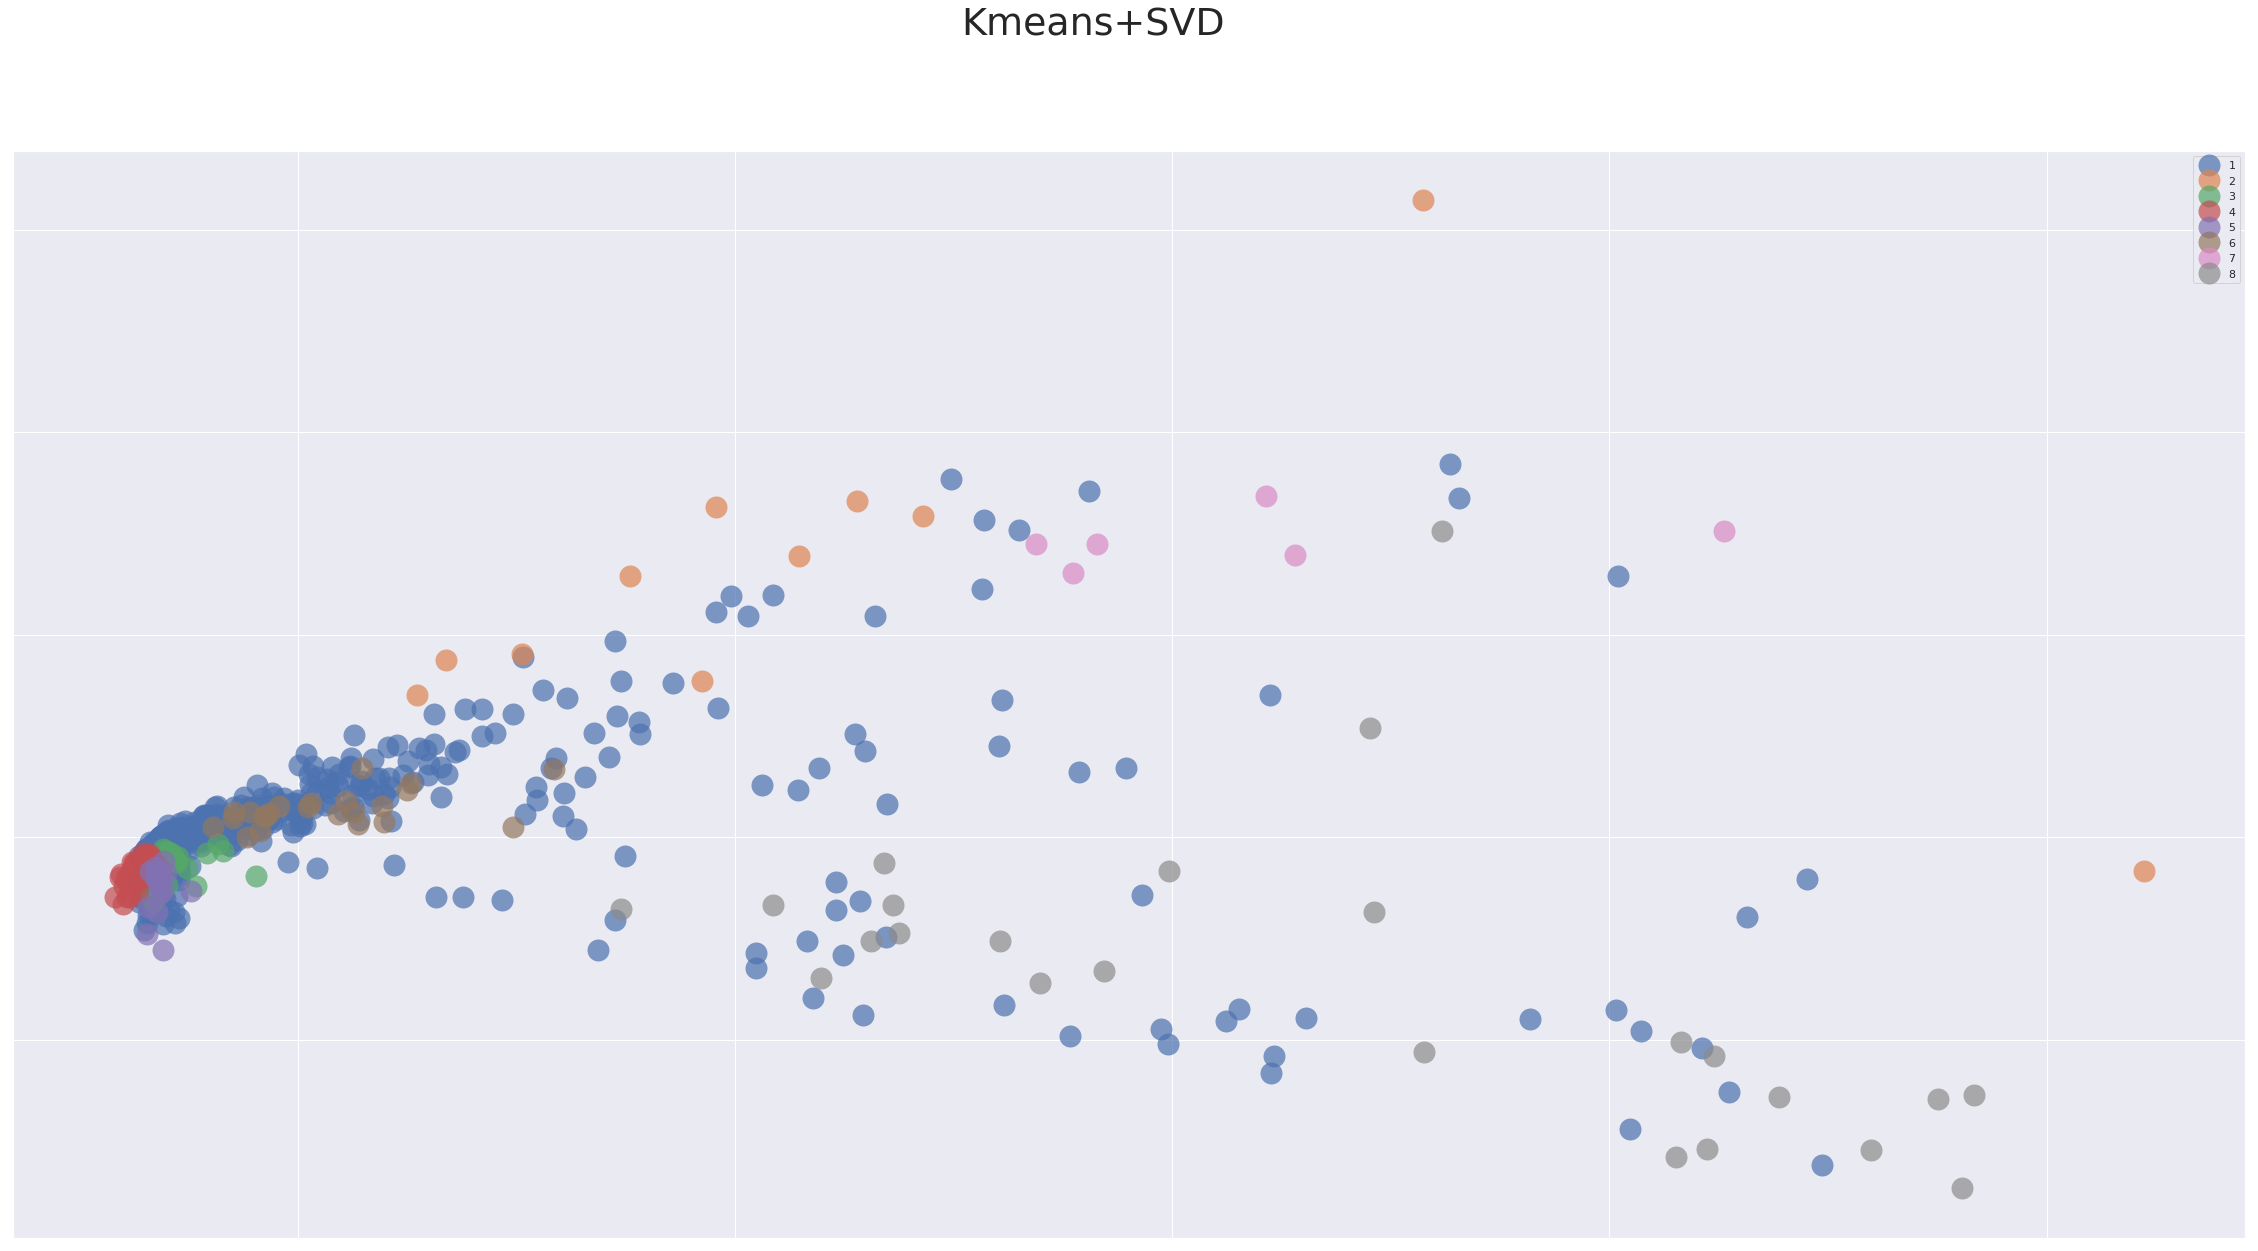

,idn,a02_trad,SVD_label,SVD1,SVD2
0,1,Bushmen,0,-5.449046,0.559562
1,2,Khoikhoi,0,-3.131956,0.176222
2,3,Xhosa,0,-2.762295,-0.220902
3,4,"Zulu,Swasi",0,-4.039606,0.922487
4,5,"Sotho, Tswana",0,-2.250557,0.248442
5,6,"Tonga, Ndebele",0,-3.894768,0.993513
6,7,Shona,0,-1.764166,1.218162
7,8,"Bemba,Kaonde,Lamba",0,-4.446332,1.045217
8,9,"Tsonga,Soli,Sala,Lenje",0,-3.599328,0.659439
9,10,Ila,0,-5.776440,0.328016


In [58]:
plot_emd('SVD',newdata,8)

/home/andrey/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/andrey/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/andrey/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/andrey/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 

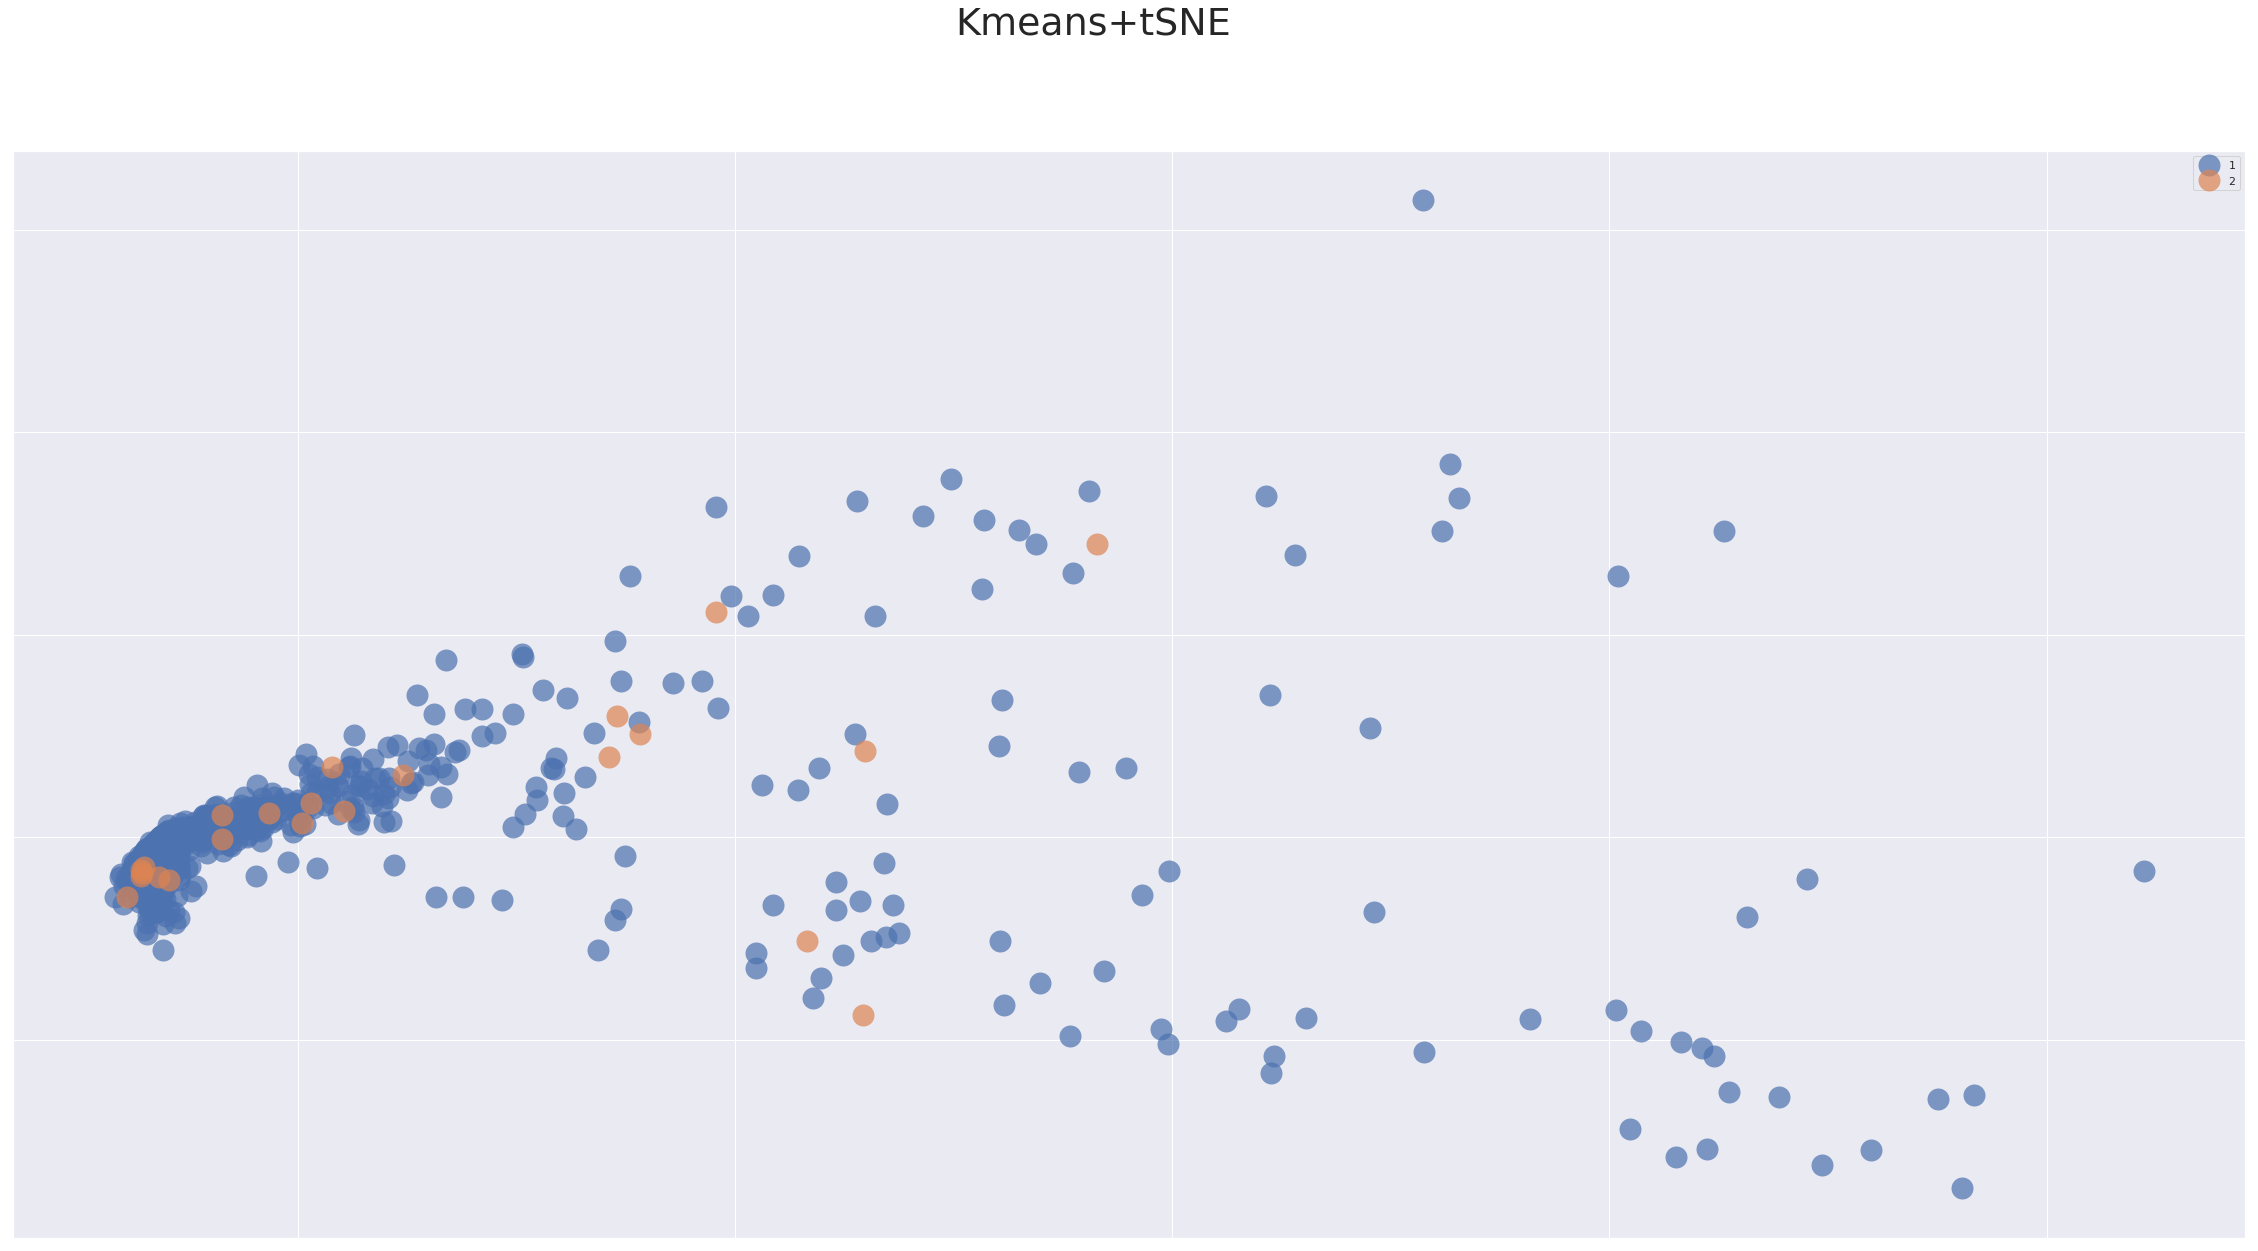

,idn,a02_trad,tSNE_label,tSNE1,tSNE2
0,1,Bushmen,0,-5.449046,0.559562
1,2,Khoikhoi,0,-3.131956,0.176222
2,3,Xhosa,0,-2.762295,-0.220902
3,4,"Zulu,Swasi",0,-4.039606,0.922487
4,5,"Sotho, Tswana",0,-2.250557,0.248442
5,6,"Tonga, Ndebele",0,-3.894768,0.993513
6,7,Shona,0,-1.764166,1.218162
7,8,"Bemba,Kaonde,Lamba",0,-4.446332,1.045217
8,9,"Tsonga,Soli,Sala,Lenje",0,-3.599328,0.659439
9,10,Ila,0,-5.776440,0.328016


In [53]:
plot_emd('tSNE',X_tsne,2)

/home/andrey/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/andrey/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/andrey/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/andrey/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 

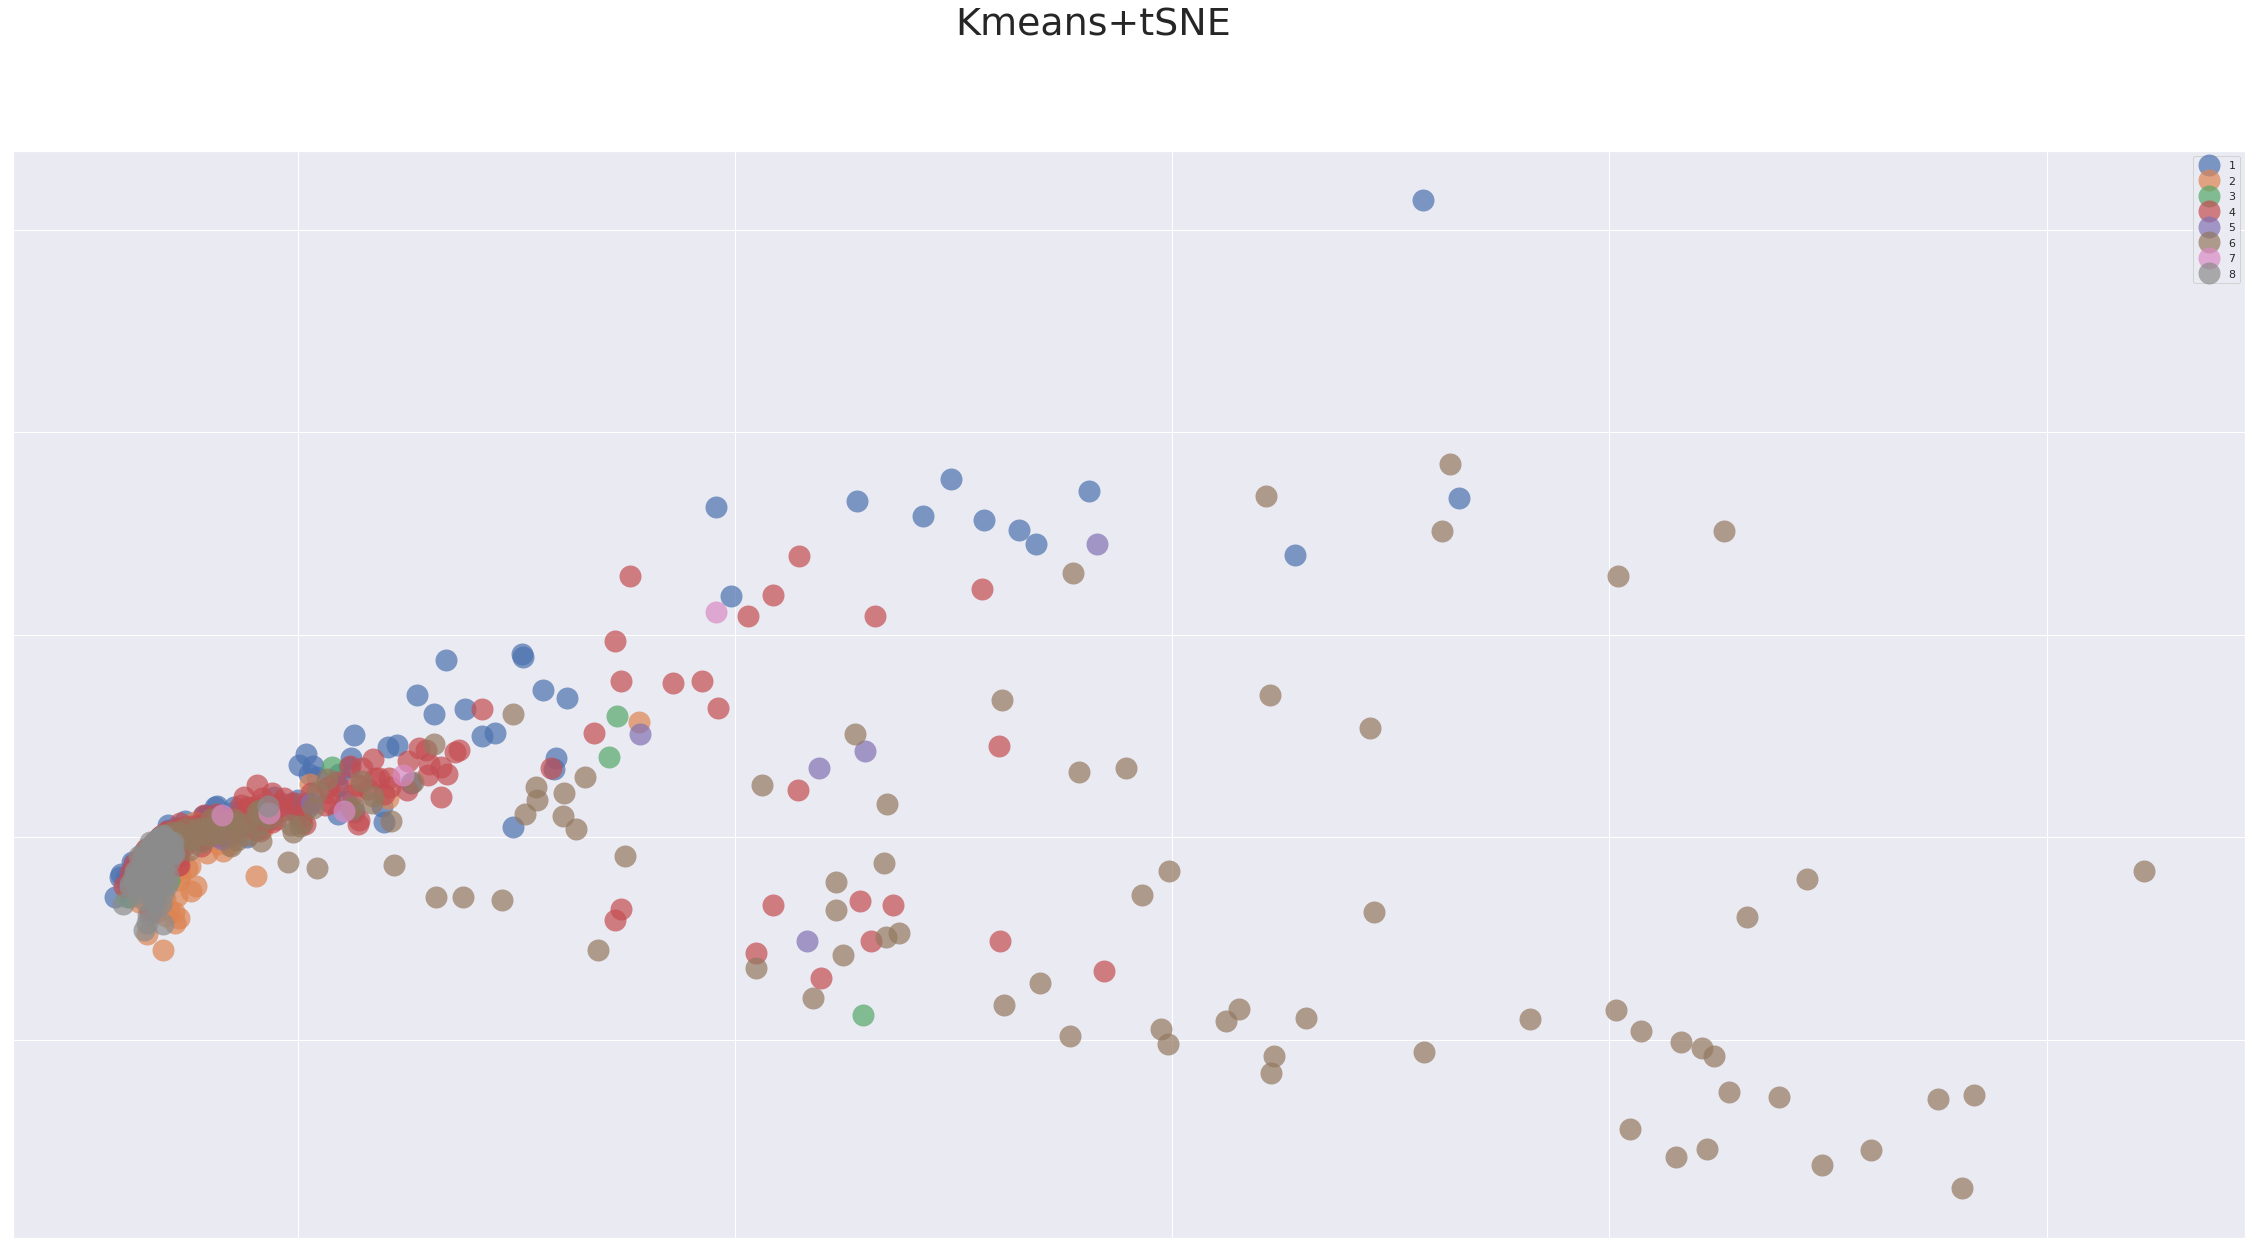

,idn,a02_trad,tSNE_label,tSNE1,tSNE2
0,1,Bushmen,3,-5.449046,0.559562
1,2,Khoikhoi,3,-3.131956,0.176222
2,3,Xhosa,5,-2.762295,-0.220902
3,4,"Zulu,Swasi",3,-4.039606,0.922487
4,5,"Sotho, Tswana",5,-2.250557,0.248442
5,6,"Tonga, Ndebele",5,-3.894768,0.993513
6,7,Shona,5,-1.764166,1.218162
7,8,"Bemba,Kaonde,Lamba",3,-4.446332,1.045217
8,9,"Tsonga,Soli,Sala,Lenje",5,-3.599328,0.659439
9,10,Ila,5,-5.776440,0.328016


In [59]:
plot_emd('tSNE',X_tsne,8)

### Hierarchy

In [57]:
from scipy.cluster.hierarchy import ward, dendrogram

# font = {'family' : 'Verdana', 'weight': 'normal', 'size'   : 22}
# rc('font', **font)

def plot_heirarchy(data, path, method = None):
    linkage_matrix = ward(data)

    fig, ax = plt.subplots(figsize=(100, 100))
    ax = dendrogram(linkage_matrix, orientation="left");
    # ax.text(size=22)
    plt.tick_params(\
        axis= 'x',
        which='both', 
        bottom='off',
        top='on',
        labelbottom='off')

    plt.tight_layout() 

    fig.suptitle(str(method)+' + Hierarchy', fontsize=20)
    fig.savefig(path)
    plt.close(fig)    # close the figure window
# plot_heirarchy(x)

In [58]:
plot_heirarchy(x_pca, method = "PCA", path = 'charts/PCA+Ward.jpg')

/home/andrey/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/andrey/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/andrey/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [59]:
plot_heirarchy(newdata, method = "SVD",path = 'charts/SVD+Ward.jpg')

/home/andrey/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/andrey/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/andrey/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [60]:
plot_heirarchy(X_tsne, method = "tSNE",path = 'charts/tSNE+Ward.jpg')

/home/andrey/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/andrey/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/andrey/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


/home/andrey/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/andrey/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,0.98,'Hierarchy')

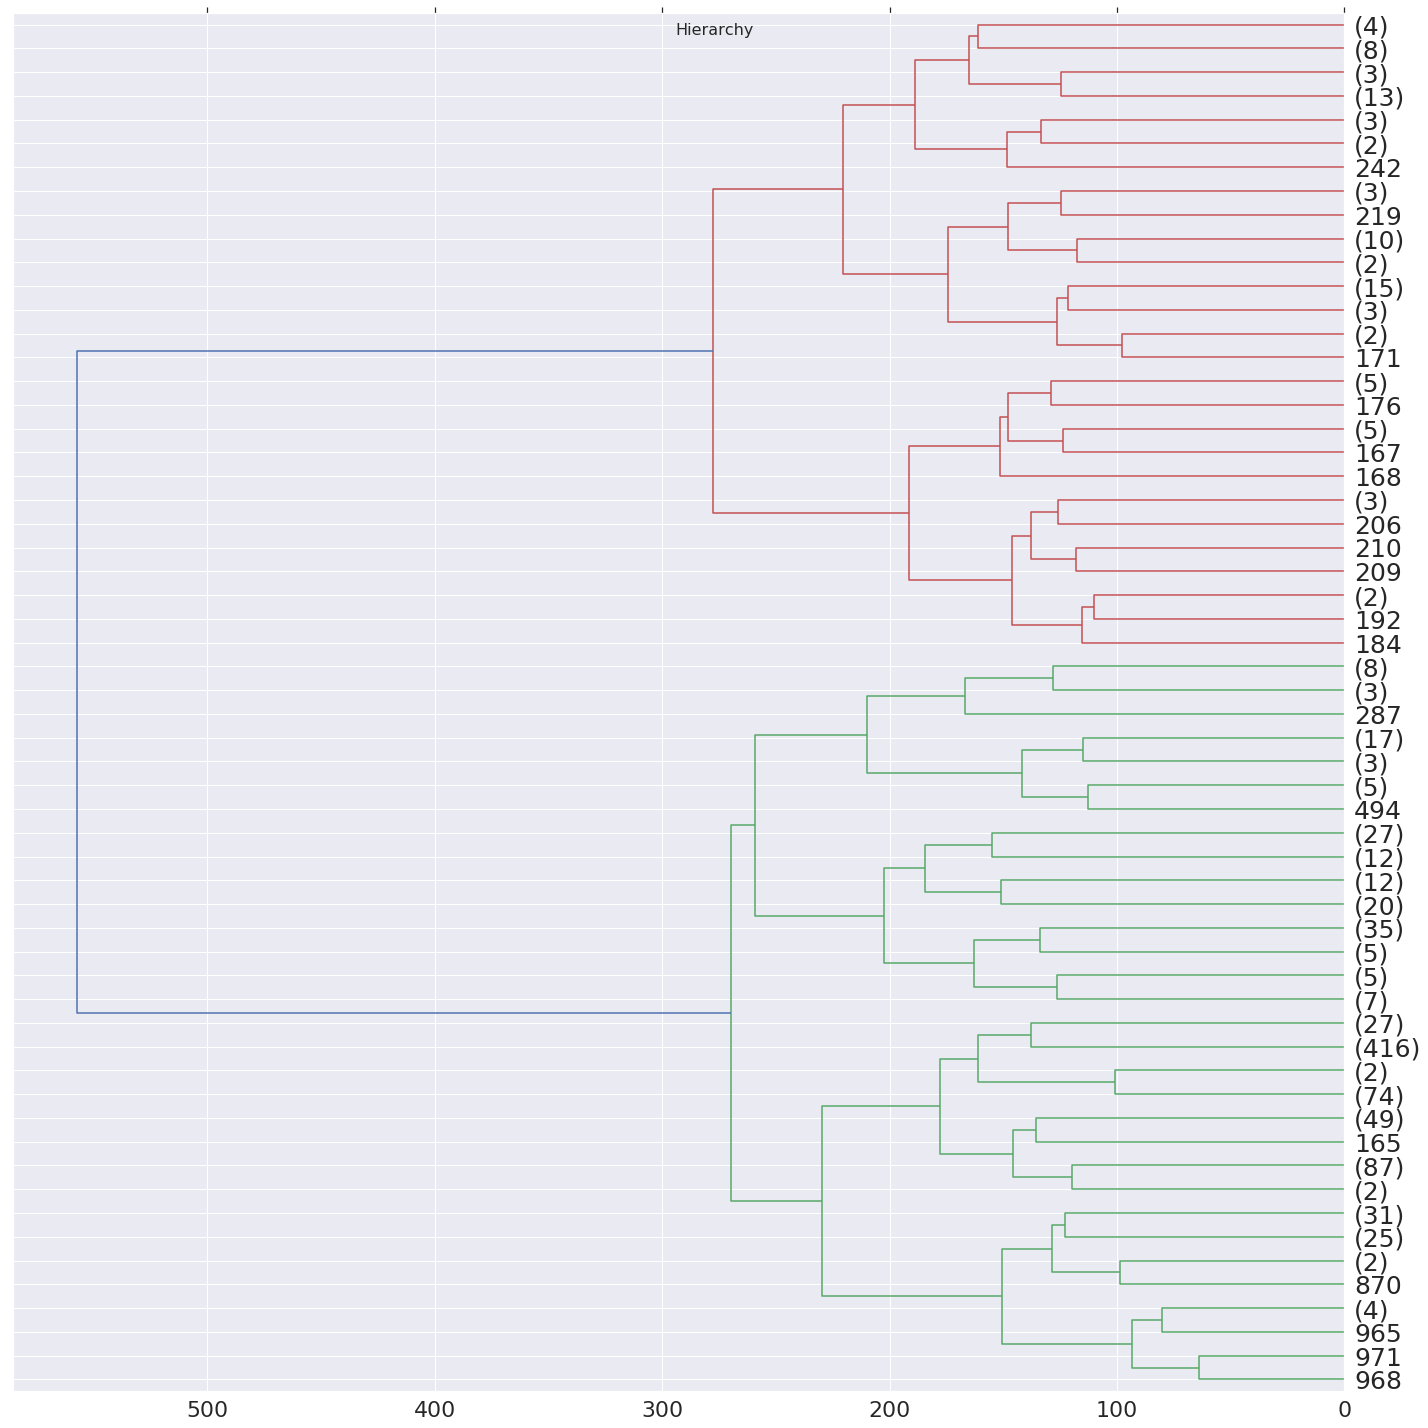

In [56]:
#truncate+increase font

linkage_matrix = ward(x_pca)

fig, ax = plt.subplots(figsize=(20, 20))
ax = dendrogram(linkage_matrix, orientation="left", truncate_mode='level', p =5);

plt.tick_params(\
    axis= 'x',
    which='both', 
    bottom='off',
    top='on',
#     labelbottom='off',
    labelsize=22)
plt.tick_params(\
    axis= 'y',
    labelsize=25)

# ax.tick_params(axis='y', which='major', labelsize=8)
plt.tight_layout() 

fig.suptitle('Hierarchy', fontsize=16)